# Introduction

This project will analyze the correlation between gross domestice product (GDP) and the life expectancy of citizens from 6 countries. 

In the process, I will first prepare the data, then analyze the data with plots, and review the findings of the study. 

The project aims at answering the following questions:

+ What is the average life expectancy and GDP of these nations?
+ What is the distribution of that life expectancy?
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?

    
**Data Sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import the Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

I will be using Pandas `.read_csv()` to load **all_data.csv** into a DataFrame called `df`. I will then inspect `df` using `.head()` to check it's contents, and use `.describe()` to get a summary of statistics for the DataFrame. `.info()` will be used to view the number of columns, labels, and data types. 

In [2]:
# Load the csv data into a dataframe
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### Summary of Review

In review of `df`, there are 4 columns with 96 observations. There appears to be no missing data. The average life expectancy at birth for the 6 countries is just under 73 years of age (72.79), with ranges of a minimum of 44.3 years to a maximum of 81 years. 

## Exploring the Data

To uncover more about the data, I will be using `.unique()` to view the 6 countries represented by the data, along with what years are represnted by the data. 

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The 6 countries represented by the data are Chile, China, Germany, Mexico, U.S.A, and Zimbabwe (as seen above). 

In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data was gathered between 2000-2015. 

### Cleaning Column Name

In order to work with the dataset more easily, one column name will be shortened. `Life expectancy at birth (years)` will be shortened to `LifeExp` using the `rename()` function to make wrangling and plotting the data easier. Along with shortening the column name, I will also be shortening the country name of `United States of America` to `USA`. 

In [7]:
df = df.rename({"Life expectancy at birth (years)": "LifeExp"}, axis = "columns")
df.Country.mask(df.Country == "United States of America", "USA", inplace = True)
df.head()

,Country,Year,LifeExp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Average Life Expectancy and GDP
First, a new table will be created to find the average life expectancy and GDP of the 6 nations. The `groupby()` and `mean()` functions were used together to find these averages. Thereafter, the `Year` column was removed using `drop()` to simply display the 3 necessary columns and averages. 

In [8]:
avg_lifeexp_gdp = df.groupby("Country").mean()
avg_lifeexp_gdp = avg_lifeexp_gdp.drop(columns = "Year").sort_values("LifeExp", ascending = False).reset_index()
avg_lifeexp_gdp

,Country,LifeExp,GDP
0,Germany,79.65625,3.094776e+12
1,Chile,78.94375,1.697888e+11
2,USA,78.06250,1.407500e+13
3,Mexico,75.71875,9.766506e+11
4,China,74.26250,4.957714e+12
5,Zimbabwe,50.09375,9.062580e+09


Zimbabwe seems to be the outlier with the lowest average life expectancy of 50 years of age, whereas the other 5 nations fall closer in line with averages ranging from 74.26-79.66 years of age. Furthermore, Zimbabwe also seems to have the lowest average GDP of 9.06 billion US dollars, and U.S.A has the highest GDP of 14.08 trillion US dollars. 

#### Bar Plots

With the averages broken down by `Country`, the following bar plots will help provide a better visual and comparison of the differences in `LifeExp` and `GDP`. 

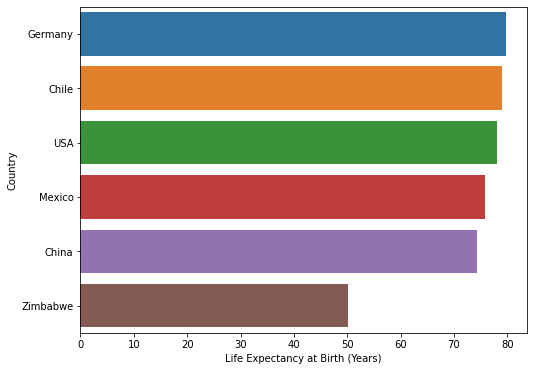

In [9]:
plt.figure(figsize = (8,6))
sns.barplot(x = "LifeExp", y = "Country", data = avg_lifeexp_gdp)
plt.xlabel("Life Expectancy at Birth (Years)");

As seen in the figure above, Germany has the highest `LifeExp` with an average of 79.66 years of age, and Zimbabwe has the lowest `LifeExp` with an average of 50.09 years of age. 

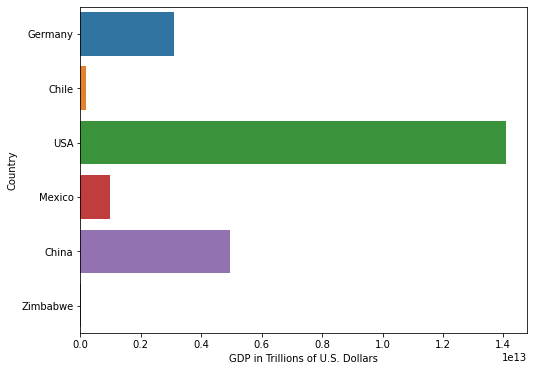

In [10]:
plt.figure(figsize = (8,6))
sns.barplot(x = "GDP", y = "Country", data = avg_lifeexp_gdp)
plt.xlabel("GDP in Trillions of U.S. Dollars");

As seen in the figure above, the US's average `GDP` far outweighs the other 5 countries in comparison, with Zimbabwe's average `GDP` not even being visible due to it being in the billions and not trillions of US dollars. China has the next largest average `GDP`, followed by Germany, Mexico, and Chile being slightly visible. 

#### Distribution Plot

Below is a distribution of life expectancy at birth in years, which appears to be very left skewed with most of the values observed on the right side of the plot. With Zimbabwe's average life expectancy being the outlier, as seen above, this would explain why the distribution is so left skewed. 

<Figure size 576x432 with 0 Axes>

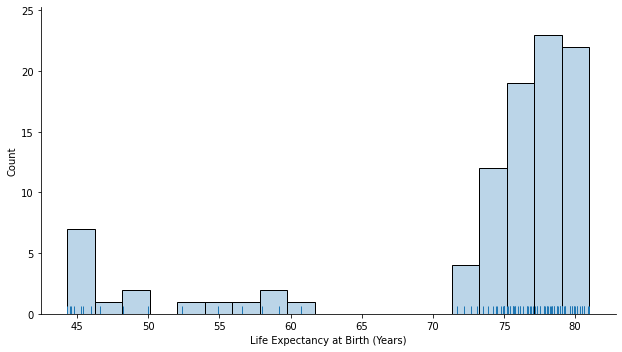

In [11]:
plt.figure(figsize = (8, 6))
sns.displot(df.LifeExp, rug = True, alpha = 0.3, aspect = 1.75)
plt.xlabel("Life Expectancy at Birth (Years)");

#### Violin & Swarm Plots

A swarm plot is used to complement the violin plots below. The points of the swarm plot are adjusted along the categorical axis so that they don't overlap, but also help illustrate the number of data points that fall around their values. 

In the plots below, `Country` is on the y-axis, while `GDP` and `LifeExp` are on the x-axis. For the `GDP` plot on the left, China and the US have a wide range of values illustrated through both the violin plot and the points of the swarm plot. Zimbabwe, Chile, and Mexico have a much more narrow range of values, but the vertical points of the swarm plot help illustrate the number of data points that fall around those values. 

For the `LifeExp` plot on the right, Zimbabwe has a very wide range of values in comparison to the other countries whose range of values appear much shorter. 

C:\Users\rvillagrana\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rvillagrana\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


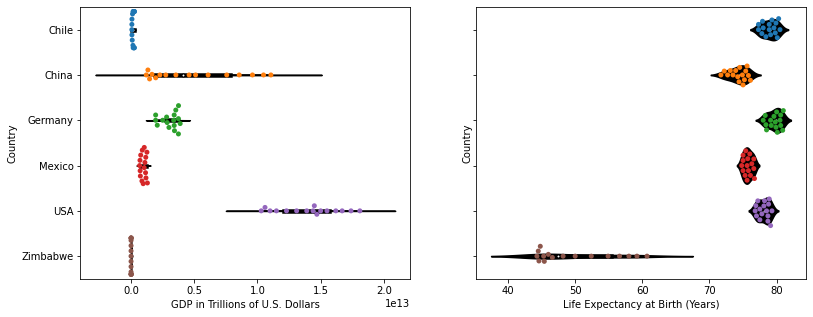

In [12]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (13, 5))
axes[0] = sns.violinplot(ax = axes[0], data = df, x = "GDP", y = "Country", color = "black")
axes[0] = sns.swarmplot(ax = axes[0], data = df, x = "GDP", y = "Country", size = 5)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax = axes[1], data = df, x = "LifeExp", y = "Country", color = "black")
axes[1] = sns.swarmplot(ax = axes[1], data = df, x = "LifeExp", y = "Country", size = 5)
axes[1].set_xlabel("Life Expectancy at Birth (Years)");

#### Line Charts

Line charts will be used below to explore `GDP` and `LifeExp` from 2000 to 2015. Though all 6 countries seen rises in `GDP` over the years, China and the U.S. seen the largest growth in `GDP` over those years. 

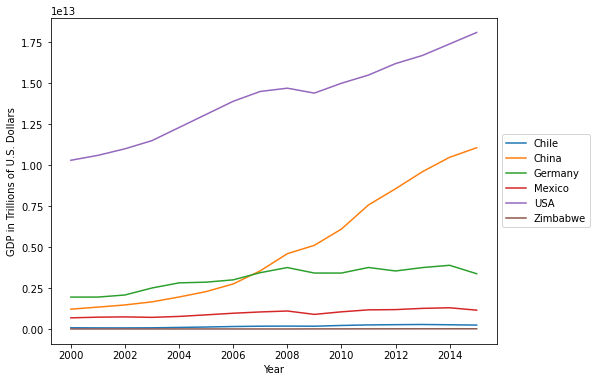

In [13]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = df, x = "Year", y = "GDP", hue = "Country")
plt.legend(loc = 6, bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

In the faceted line charts below, each country has their own y=axis, which then simplifies comparing the shape of their `GDP` over the years. This proves to be very helpful, and makes it much easier to see that all the countries have experienced increases in `GDP`. 

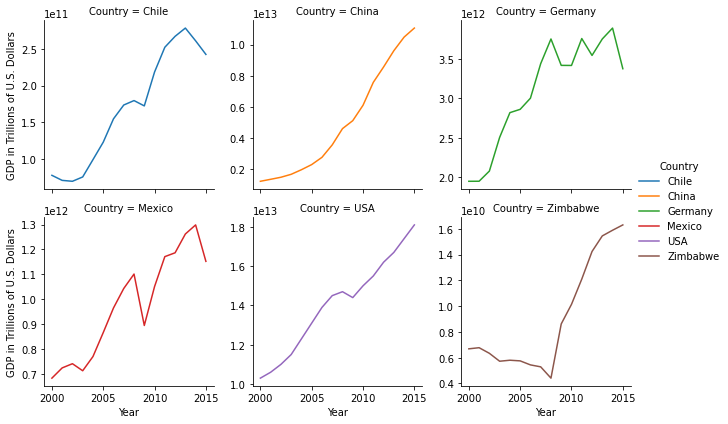

In [14]:
gGDP = sns.FacetGrid(data = df, col = "Country", col_wrap = 3, hue = "Country", sharey = False)

gGDP = (gGDP.map(sns.lineplot, "Year", "GDP").add_legend()
        .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

gGDP;

The line chart below shows that every country has seen an increase in life expectancy from 2000-2015, with the greatest increase coming from Zimbabwe after dipping in 2004. 

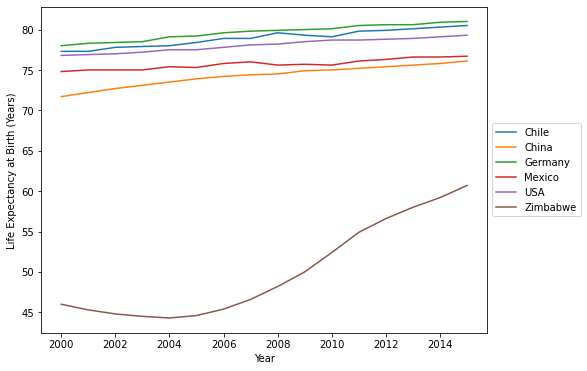

In [15]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = df, x = "Year", y = "LifeExp", hue = "Country")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("Life Expectancy at Birth (Years)"); 

The faceted line charts below show a breakdown of life expectancy by country at their own individual scales. Zimbabwe is not the only country that appears to have a dip in life expectancy over those years, Mexico and Chile both appear to have dipped between 2007-2010. China, Germany, and the U.S. appear to have steady increases from 2000-2015.

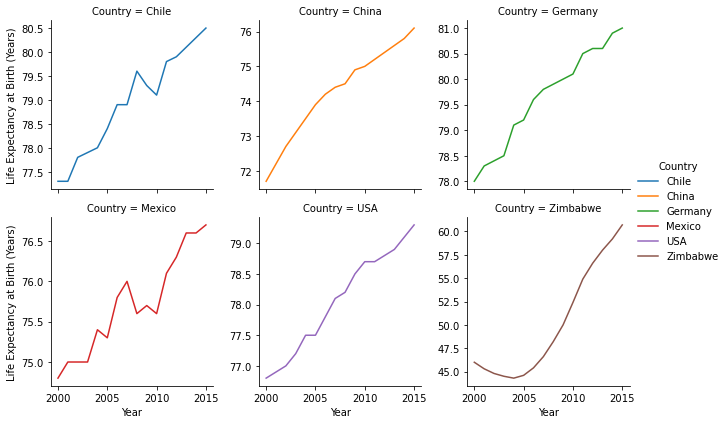

In [16]:
gLifeExp = sns.FacetGrid(data = df, col = "Country", col_wrap = 3, hue = "Country", sharey = False)

gLifeExp = (gLifeExp.map(sns.lineplot, "Year", "LifeExp").add_legend()
        .set_axis_labels("Year", "Life Expectancy at Birth (Years)"))

gLifeExp;

#### Scatter Plot

The following scatter plots will be used to compare relationship between `GDP` and `LifeExp`. As `LifeExp` increases in Zimbabwe, it appears `GDP` seems to remain on the same flat horizontal line. For the remainder of the countries, there seems to be a positive relationship between `GDP` and `LifeExp`. Chile's slope seems to be very minor, and almost flat, while the U.S. and China have very steep slopes as `LifeExp` increases and `GDP` rises. 

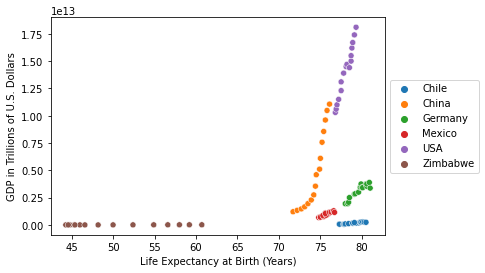

In [17]:
sns.scatterplot(data = df, x = "LifeExp", y = "GDP", hue = "Country")\
.legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1)
plt.xlabel("Life Expectancy at Birth (Years)")
plt.ylabel("GDP in Trillions of U.S. Dollars");

Just as seen in the previous faceted plots, when the countries are broken down into their own individual scatter plots with their own scales, there is a positive relationship as both, `GDP` and `LifeExp`, increase. Zimbabwe's slope no longer looks flat as both `LifeExp` and `GDP` rise. 

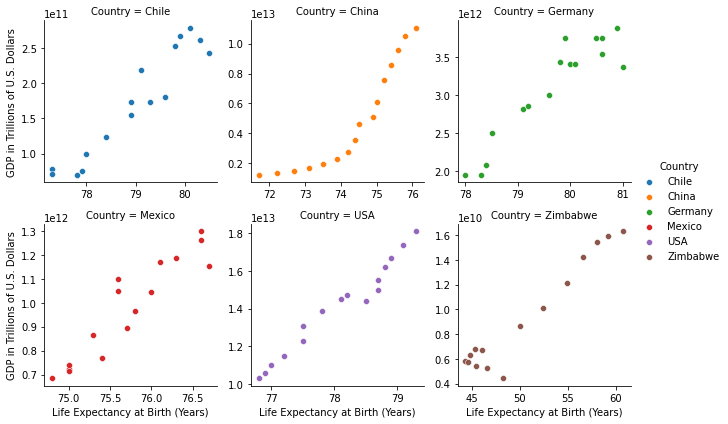

In [18]:
GDP_LifeExp = sns.FacetGrid(data = df, col = "Country", col_wrap = 3, hue = "Country", sharey = False, sharex = False)

GDP_LifeExp = (GDP_LifeExp.map(sns.scatterplot, "LifeExp", "GDP").add_legend()
              .set_axis_labels("Life Expectancy at Birth (Years)", "GDP in Trillions of U.S. Dollars"))

GDP_LifeExp;

#### Further Research

The following code is to see which country had the largest growth in overall `GDP` over the years. China had the largest growth in `GDP`, coming in at 9.85 trillion U.S. dollars.

In [19]:
gdp_diff = (df.groupby("Country")["GDP"].max() - df.groupby("Country")["GDP"].min())\
.sort_values(ascending = False).reset_index()
gdp_diff

,Country,GDP
0,China,9.853350e+12
1,USA,7.800000e+12
2,Germany,1.940660e+12
3,Mexico,6.148120e+11
4,Chile,2.086472e+11
5,Zimbabwe,1.188897e+10


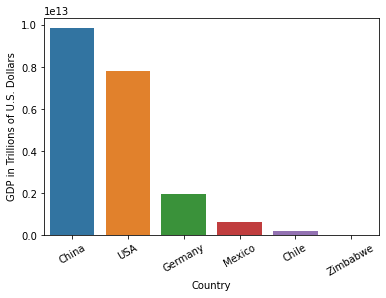

In [20]:
ax = sns.barplot(data = gdp_diff, x = "Country", y = "GDP")
ax.set_xticks(range(len(gdp_diff.Country)))
ax.set_xticklabels(gdp_diff.Country, rotation = 30)
plt.ylabel("GDP in Trillions of U.S. Dollars");

The following code is to see which country had the largest growth in overall `LifeExp` over the years. Zimbabwe had the largest growth in years of life expectancy coming in at 16.4 years. 

In [21]:
LifeExp_diff = (df.groupby("Country")["LifeExp"].max() - df.groupby("Country")["LifeExp"].min())\
.sort_values(ascending = False).reset_index()
LifeExp_diff

,Country,LifeExp
0,Zimbabwe,16.4
1,China,4.4
2,Chile,3.2
3,Germany,3.0
4,USA,2.5
5,Mexico,1.9


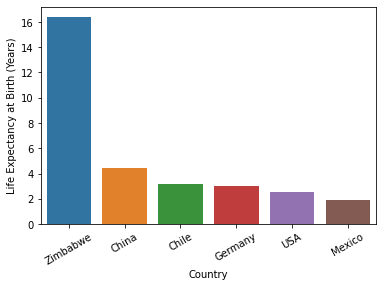

In [22]:
ax = sns.barplot(data = LifeExp_diff, x = "Country", y = "LifeExp")
ax.set_xticks(range(len(LifeExp_diff.Country)))
ax.set_xticklabels(LifeExp_diff.Country, rotation = 30)
plt.ylabel("Life Expectancy at Birth (Years)");

## Conclusion

In review of the data and the plots, the following questions were able to be answered:

+ What are the average life expectancy and GDP of these nations?
  + The average life expectancy of 5 of the 6 nations ranged between 74.26-79.66 years, with the only exception being Zimbabwe, whose average life expectancy was 50 years. There was a wide range in average GDP, the lowest average GDP came from Zimbabwe at 9.06 billion U.S. dollars, and the largest average GDP came from the U.S. at 14.08 trillion U.S. dollars. 
+ What is the distribution of that life expectancy?
  + The life expectancy distribution was very left skewed with most of the observations on the right side. With Zimbabwe's average life expectancy being the outlier, this would explain why the distribution is so left skewed.
+ Has life expectancy increased over time in the six nations?
  + Yes, in review of the line graph, and faceted line graphs of life expectancy, you can see each country seen an increase over the years. After taking a dip in life expectancy in 2004, Zimbabwe had the largest rise in years thereafter. 
+ Has GDP increased over time in the six nations?
  + From 2000-2015, each country did see an increase in GDP. The U.S. and China seemed to have the largest increase in GDP over time. 
+ Is there a correlation between GDP and life expectancy of a country?
  + Yes, there is a positive correlation bewteen GDP and life expectancy for each country listed. 
  
  
Though the dataset that was provided was fairly small, there were quite a few things to look at. When in comparison to one another, it was quite interesting to see how the different plots gave different, and sometimes slightly misleading information. In the end, it was evident that, over time, all the countries in the dataset displayed rises in both categories of GDP and life expectancy. The largest rise in years of life expectancy came from Zimbabwe with 16.4 years, while the largest rise in GDP appears to have come from China with an increase of 9.85 trillion U.S. dollars from 2000-2015. 